# CRISP-DM Framework
### Bussiness understanding
- Give Overview of available & required resources
- Determine datamining goal
- Define success criteria

### Data understanding
- Data exploration
- Data description
- Data quality checks -> Fix Income = 0 values (all in education= College), Fix 0 values in Flights DB, why do we have float numbers for flights with compansions

### Data preparation
- Define inclusion & exclusion cirteria
- Clean data

### Modeling
- Test different models on the data
- Evaluate against criteria

### Evaluation
- Check final results against defined business objects

### Deployment
- Writing Report
- Create info poster

# Table of Contents

1. [Business Understanding](#business-understanding)
   1. Give overview of available & required resources
   2. Determine data mining goal
   3. Define success criteria

2. [Data Understanding](#data-understanding)
   1. Data exploration
   2. Data description
   3. Data quality checks

3. [Data Preparation](#data-preparation)
   1. Define inclusion & exclusion criteria
   2. Clean data

4. [Modeling](#modeling)
   1. Test different models on the data
   2. Evaluate against criteria

5. [Evaluation](#evaluation)
   1. Check final results against defined business objectives


## Business Understanding

#### Determine data mining goal
The goal of our project is to identify airline customer segments that are currently undervalued or underserved but have the potential to be turned into profitable customers via targeted marketing efforts. We evaluate a customer's potential via its Total Lifetime Value. For the separation criteria, we are working towards criteria that can be used in marketing campaigns to target this specific customer segment (e.g., location, demographics).

#### Define success criteria
Our success criteria are evaluated based on how well the final variables describe and differentiate a specific customer segment.

## Data Understanding

## Data Preparation -> cleaning the dataset (Libero)

**(Done)**

- Remove useless features in Customers
- Remove duplicate ID in Customer (save in a list for after)
- Remove Useless features in Flights
- Check NaNs Customer and choose what to do (they are missing in flights, so removed)
- Check Nans Flights and choose what to do
- Remove outperiod flights
- 1-Hot for cancelled subs
- Total days as subs, use datetime, maybe useful
- Remove zeroes for flights outside
- Was member columns

- Percentage of flights inside sub
- Check Lang/Lat
- Percentage of flights in the month * Days in the month as sub
- Check the floats when they happen
- Divide by 0.9 in flights where we have floats
- Avg money spent for flight per costumer

- Total point in costumer db
-------
** To Do**


** Marcell **
- Points redemption rate
- AVG fligth distance
- Companion ratio
- Points per kilometer efficiency(?)
- Distance from hub airport
- Location code and income for socioeconomic
- Public stats for college income
- Cluster using lat/long
- negative days subs









## Modeling

## Evaluation



In [ ]:
from sklearn.impute import KNNImputer
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from google.colab import data_table
from matplotlib import pyplot as plt
import seaborn as sns

data_table.enable_dataframe_formatter() # Allow option to visualize tables in better way

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_costumer = pd.read_csv('/content/drive/MyDrive/data_mining/DM_AIAI_CustomerDB.csv')
df_flights = pd.read_csv('/content/drive/MyDrive/data_mining/DM_AIAI_FlightsDB.csv')
#df_metadata = pd.read_csv('/content/drive/MyDrive/data_mining/DM_AIAI_Metadata.csv')  ignore this, just a non csv metadata file

## Costumer data quality check


In [ ]:
#check first five rows of ever column

for col in df_costumer.columns:
    print(f"\nColumn: {col}")
    print(df_costumer[col].head(5).to_list())


Column: Unnamed: 0
[0, 1, 2, 3, 4]

Column: Loyalty#
[480934, 549612, 429460, 608370, 530508]

Column: First Name
['Cecilia', 'Dayle', 'Necole', 'Queen', 'Claire']

Column: Last Name
['Householder', 'Menez', 'Hannon', 'Hagee', 'Latting']

Column: Customer Name
['Cecilia Householder', 'Dayle Menez', 'Necole Hannon', 'Queen Hagee', 'Claire Latting']

Column: Country
['Canada', 'Canada', 'Canada', 'Canada', 'Canada']

Column: Province or State
['Ontario', 'Alberta', 'British Columbia', 'Ontario', 'Quebec']

Column: City
['Toronto', 'Edmonton', 'Vancouver', 'Toronto', 'Hull']

Column: Latitude
[43.653225, 53.544388, 49.28273, 43.653225, 45.42873]

Column: Longitude
[-79.383186, -113.49093, -123.12074, -79.383186, -75.713364]

Column: Postal code
['M2Z 4K1', 'T3G 6Y6', 'V6E 3D9', 'P1W 1K4', 'J8Y 3Z5']

Column: Gender
['female', 'male', 'male', 'male', 'male']

Column: Education
['Bachelor', 'College', 'College', 'College', 'Bachelor']

Column: Location Code
['Urban', 'Rural', 'Urban', 'Sub

In [ ]:
#check nrows and ncolumns
print(df_costumer.shape)

(16921, 21)


We have that number of rows and column, now for each column we need to understand if they are useful or not. For the preliminary analysis I decided to drop completely:

-First name

-Full name

-Country (all Canada)

In [ ]:
df_costumer = df_costumer.drop(columns=['First Name', 'Customer Name', "Last Name", 'Country'])

In [ ]:
# Calculate the total number of duplicate rows
total_duplicate_rows = df_costumer.duplicated('Loyalty#', keep=False).sum()

print("Total number of duplicate rows based on 'Loyalty#':", total_duplicate_rows)

Total number of duplicate rows based on 'Loyalty#': 327


In [ ]:
# Identify duplicate Loyalty# values
duplicate_loyalty_numbers = df_costumer[df_costumer.duplicated('Loyalty#', keep=False)]['Loyalty#'].tolist()

# Print the list of duplicate Loyalty# values
print("Duplicate Loyalty# values:", duplicate_loyalty_numbers)

# Remove all duplicate Loyalty# values from the DataFrame
df_costumer = df_costumer.drop(df_costumer[df_costumer.duplicated('Loyalty#', keep=False)].index)


# Print the shape of the DataFrame after removing duplicates
print("Shape of df_costumer after removing duplicates:", df_costumer.shape)

Duplicate Loyalty# values: [193662, 746226, 279419, 354438, 719633, 156031, 354438, 411523, 615439, 536021, 106001, 890361, 825593, 950980, 971370, 323821, 309230, 556755, 968034, 304600, 601131, 951353, 710003, 224676, 361237, 981508, 465260, 577232, 899760, 642020, 101902, 713132, 687951, 486860, 470998, 736504, 308480, 775768, 474305, 646756, 357901, 687951, 593252, 886803, 896861, 407404, 876062, 497476, 615439, 615561, 156031, 825593, 684889, 874780, 762990, 486860, 322169, 101902, 960050, 351615, 988392, 979115, 547522, 577232, 653081, 584833, 455758, 510182, 869276, 200519, 286636, 654433, 710003, 112142, 783165, 460272, 328623, 135421, 536021, 464256, 206050, 351937, 499874, 974875, 727091, 336882, 741848, 470998, 200519, 775768, 411523, 622975, 130331, 357901, 368073, 981508, 989528, 181082, 402697, 511862, 208241, 965605, 114414, 585756, 255475, 512296, 876062, 890702, 342945, 573446, 947778, 604870, 584782, 762990, 286636, 208241, 750578, 831341, 403529, 295906, 971370, 4641

In [ ]:
# Count the number of rows in df_flights where 'Loyalty#' is in the list of duplicate Loyalty# values
num_rows_with_duplicates_in_flights = df_flights[df_flights['Loyalty#'].isin(duplicate_loyalty_numbers)].shape[0]

print("Number of rows in df_flights with duplicate Loyalty# values:", num_rows_with_duplicates_in_flights)

Number of rows in df_flights with duplicate Loyalty# values: 11772


In [ ]:
df_flights.shape

(608436, 10)

In [ ]:
df_flights.loc[df_flights['Year'] == 2019, 'NumFlightsWithCompanions'] = df_flights['NumFlightsWithCompanions'] / 0.9


In [ ]:
df_flights.loc[df_flights['Year'] == 2019, 'NumFlights'] = df_flights['NumFlights'] / 0.9


In [ ]:
# Remove rows from df_flights where 'Loyalty#' is in the list of duplicate Loyalty# values
df_flights = df_flights[~df_flights['Loyalty#'].isin(duplicate_loyalty_numbers)]

# Print the shape of the DataFrame after removing duplicates
print("Shape of df_flights after removing rows with duplicate Loyalty#:", df_flights.shape)

Shape of df_flights after removing rows with duplicate Loyalty#: (596664, 10)


In [ ]:
df_costumer.isna().sum()

,0
Unnamed: 0,0
Loyalty#,0
Province or State,0
City,0
Latitude,0
Longitude,0
Postal code,0
Gender,0
Education,0
Location Code,0


We lose 40 rows at most (If they are not the same), we drop them. Stay with CancellationDate, we apply a token DateTime for today, so that we can calculate the number of days

In [ ]:
df_costumer = df_costumer.dropna(subset=['Income', 'Customer Lifetime Value'])

In [ ]:
df_costumer.shape #they were the same

(16574, 17)

In [ ]:
df_costumer.isna().sum()

,0
Unnamed: 0,0
Loyalty#,0
Province or State,0
City,0
Latitude,0
Longitude,0
Postal code,0
Gender,0
Education,0
Location Code,0


In [ ]:
df_flights.isna().sum()

,0
Loyalty#,0
Year,0
Month,0
YearMonthDate,0
NumFlights,0
NumFlightsWithCompanions,0
DistanceKM,0
PointsAccumulated,0
PointsRedeemed,0
DollarCostPointsRedeemed,0


In [ ]:
loyalty_in_flights = df_flights['Loyalty#'].unique()
loyalty_in_costumer = df_costumer['Loyalty#'].unique()

loyalty_not_in_costumer = list(set(loyalty_in_flights) - set(loyalty_in_costumer))

print("Loyalty# in flights but not in costumer:", loyalty_not_in_costumer)

Loyalty# in flights but not in costumer: []


In [ ]:
df_costumer['EnrollmentDateOpening'] = pd.to_datetime(df_costumer['EnrollmentDateOpening'], errors='coerce')
df_costumer['CancellationDate'] = pd.to_datetime(df_costumer['CancellationDate'], errors='coerce')
df_flights['YearMonthDate'] = pd.to_datetime(df_flights['YearMonthDate'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# Handle Missing Cancellation Dates: Fill missing 'CancellationDate' values with a future date
future_date = pd.to_datetime('2099-12-31') # Choose a date well beyond the dataset's range
df_costumer['CancellationDate'] = df_costumer['CancellationDate'].fillna(future_date)

In [ ]:
# Create a new column 'Cancelled_Subscription' in df_costumer
# It will be 1 if CancellationDate is not null and not the future date, and 0 otherwise.
df_costumer['Cancelled_Subscription'] = ((df_costumer['CancellationDate'].notna()) & (df_costumer['CancellationDate'] != pd.to_datetime('2099-12-31'))).astype(int)

# Display the first few rows to show the new column
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2019-02-15,2099-12-31,3839.14,Standard,0
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,2019-03-09,2099-12-31,3839.61,Standard,0
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,1
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2016-02-17,2099-12-31,3839.75,Standard,0
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,2017-10-25,2099-12-31,3842.79,2021 Promotion,0


In [ ]:
# Define the end date for calculating subscription duration for active subscriptions
end_date = pd.to_datetime('2025-10-08')

# Calculate the subscription duration
# If CancellationDate is the future date (2099), use the specified end_date, otherwise use the CancellationDate
df_costumer['Subscription_Duration_Days'] = (
    df_costumer['CancellationDate'].apply(lambda x: end_date if x == pd.to_datetime('2099-12-31') else x)
    - df_costumer['EnrollmentDateOpening']
).dt.days

# Display the first few rows to show the new column
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2019-02-15,2099-12-31,3839.14,Standard,0,2427
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,2019-03-09,2099-12-31,3839.61,Standard,0,2405
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,1,1274
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2016-02-17,2099-12-31,3839.75,Standard,0,3521
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,2017-10-25,2099-12-31,3842.79,2021 Promotion,0,2905


In [ ]:
# Merge df_costumer and df_flights on 'Loyalty#'
df_merged = pd.merge(df_costumer, df_flights, on='Loyalty#', how='left')

# Filter flights within the subscription period for each customer
df_flights_in_sub = df_merged[
    (df_merged['YearMonthDate'] >= df_merged['EnrollmentDateOpening']) &
    (df_merged['YearMonthDate'] <= df_merged['CancellationDate'])
]

# Group by 'Loyalty#' and count the number of flights within the subscription period
flights_in_sub_count = df_flights_in_sub.groupby('Loyalty#')['NumFlights'].sum().reset_index()
flights_in_sub_count.rename(columns={'NumFlights': 'Flights_in_Subscription'}, inplace=True)

# Group by 'Loyalty#' and count the total number of flights
total_flights_count = df_merged.groupby('Loyalty#')['NumFlights'].sum().reset_index()
total_flights_count.rename(columns={'NumFlights': 'Total_Flights'}, inplace=True)

# Merge the counts back to df_costumer
df_costumer = pd.merge(df_costumer, flights_in_sub_count, on='Loyalty#', how='left')
df_costumer = pd.merge(df_costumer, total_flights_count, on='Loyalty#', how='left')

# Fill NaN values with 0 for customers with no flights
df_costumer['Flights_in_Subscription'] = df_costumer['Flights_in_Subscription'].fillna(0)
df_costumer['Total_Flights'] = df_costumer['Total_Flights'].fillna(0)


# Calculate the percentage of flights within the subscription period
df_costumer['percentage_flights_as_sub'] = (df_costumer['Flights_in_Subscription'] / df_costumer['Total_Flights']) * 100

# Handle cases where Total_Flights is 0 to avoid division by zero
df_costumer['percentage_flights_as_sub'] = df_costumer['percentage_flights_as_sub'].replace([float('inf'), -float('inf')], 0)
df_costumer['percentage_flights_as_sub'] = df_costumer['percentage_flights_as_sub'].fillna(0)


# Display the updated df_costumer with the new column
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription,Total_Flights,percentage_flights_as_sub
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,Star,2019-02-15,2099-12-31,3839.14,Standard,0,2427,193.0,196.0,98.469388
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,Star,2019-03-09,2099-12-31,3839.61,Standard,0,2405,257.0,289.0,88.927336
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,Star,2017-07-14,2021-01-08,3839.75,Standard,1,1274,126.0,126.0,100.000000
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,Star,2016-02-17,2099-12-31,3839.75,Standard,0,3521,204.0,204.0,100.000000
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,Star,2017-10-25,2099-12-31,3842.79,2021 Promotion,0,2905,175.0,175.0,100.000000


In [ ]:
print(df_costumer["Longitude"].unique()) #29 unique values

[ -79.383186 -113.49093  -123.12074   -75.713364  -77.576309  -73.567253
 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189  -74.596184
 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374  -80.953033
 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189   -119.49601
  -52.712578  -76.485954 -115.5708   -135.05684   -63.131069]


In [ ]:
print(df_costumer["Latitude"].unique()) #29 unique values

[43.653225 53.544388 49.28273  45.42873  44.101128 45.50169  55.759628
 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615 50.116322
 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766 42.984924
 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398 60.721188
 46.238239]


In [ ]:
print(df_costumer["City"].unique()) #29 unique values

['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Whitehorse' 'Charlottetown']


I would drop the long lat columns since they are redundant with the city, they tell us the same thing.

In [ ]:
df_merged_flights = pd.merge(df_flights, df_costumer, on='Loyalty#', how='left')

def calculate_subscription_days_in_month(row):
    flight_month_date = row['YearMonthDate']
    enrollment_date = row['EnrollmentDateOpening']
    cancellation_date = row['CancellationDate']

    # Calculate the start and end dates of the flight month
    start_of_month = flight_month_date.replace(day=1)
    end_of_month = (start_of_month + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    # Determine the effective enrollment and cancellation dates for the month
    effective_enrollment_date = max(enrollment_date, start_of_month)
    effective_cancellation_date = min(cancellation_date, end_of_month)

    # Calculate the number of subscription days within the month
    subscription_days = (effective_cancellation_date - effective_enrollment_date).days

    return max(0, subscription_days + 1) # Add 1 to include the start day

df_merged_flights['Subscription_Days_in_Month'] = df_merged_flights.apply(calculate_subscription_days_in_month, axis=1)

#display(df_merged_flights.head())

df_merged_flights['Days_in_Month'] = df_merged_flights['YearMonthDate'].dt.daysinmonth
df_merged_flights['percentage_subscription_days_in_month'] = (df_merged_flights['Subscription_Days_in_Month'] / df_merged_flights['Days_in_Month']) * 100
df_merged_flights['percentage_subscription_days_in_month'] = df_merged_flights['percentage_subscription_days_in_month'].replace([float('inf'), -float('inf')], 0).fillna(0)
#display(df_merged_flights.head())

df_merged_flights['NumFlights_normalized_sub'] = df_merged_flights['NumFlights'] * (df_merged_flights['percentage_subscription_days_in_month'] / 100)
df_merged_flights['NumFlightsWithCompanions_normalized_sub'] = df_merged_flights['NumFlightsWithCompanions'] * (df_merged_flights['percentage_subscription_days_in_month'] / 100)
#display(df_merged_flights.head())

df_merged_flights['percentage_not_subscribed_days_in_month'] = 100 - df_merged_flights['percentage_subscription_days_in_month']
df_merged_flights['NumFlights_normalized_not_sub'] = df_merged_flights['NumFlights'] * (df_merged_flights['percentage_not_subscribed_days_in_month'] / 100)
df_merged_flights['NumFlightsWithCompanions_normalized_not_sub'] = df_merged_flights['NumFlightsWithCompanions'] * (df_merged_flights['percentage_not_subscribed_days_in_month'] / 100)
#display(df_merged_flights.head())

# Identify the columns that were originally in df_flights
original_flights_columns = ['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights', 'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

# Identify the newly created normalized columns
normalized_columns = ['NumFlights_normalized_sub', 'NumFlightsWithCompanions_normalized_sub', 'NumFlights_normalized_not_sub', 'NumFlightsWithCompanions_normalized_not_sub']

# Create a new DataFrame with only the original flights columns and the normalized columns
df_flights = df_merged_flights[original_flights_columns + normalized_columns].copy()

# Display the first few rows of the new dataframe
display(df_flights.head())

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,NumFlights_normalized_sub,NumFlightsWithCompanions_normalized_sub,NumFlights_normalized_not_sub,NumFlightsWithCompanions_normalized_not_sub
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.0,0.0,0.0,2.0,2.0,0.0,0.0
1,464105,2021,12,2021-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,2021-12-01,10.0,3.0,14745.0,1474.0,0.0,0.0,10.0,3.0,0.0,0.0
3,185013,2021,12,2021-12-01,16.0,4.0,26311.0,2631.0,3213.0,32.0,16.0,4.0,0.0,0.0
4,216596,2021,12,2021-12-01,9.0,0.0,19275.0,1927.0,0.0,0.0,9.0,0.0,0.0,0.0


In [ ]:
df_flights

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,NumFlights_normalized_sub,NumFlightsWithCompanions_normalized_sub,NumFlights_normalized_not_sub,NumFlightsWithCompanions_normalized_not_sub
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.00,0.0,0.0,2.0,2.0,0.0,0.0
1,464105,2021,12,2021-12-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,2021-12-01,10.0,3.0,14745.0,1474.00,0.0,0.0,10.0,3.0,0.0,0.0
3,185013,2021,12,2021-12-01,16.0,4.0,26311.0,2631.00,3213.0,32.0,16.0,4.0,0.0,0.0
4,216596,2021,12,2021-12-01,9.0,0.0,19275.0,1927.00,0.0,0.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596659,999902,2019,12,2019-12-01,8.0,0.0,30766.5,3076.65,0.0,0.0,8.0,0.0,0.0,0.0
596660,999911,2019,12,2019-12-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
596661,999940,2019,12,2019-12-01,16.0,1.0,18261.0,1826.10,0.0,0.0,0.0,0.0,16.0,1.0
596662,999982,2019,12,2019-12-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_flights.shape

(596664, 14)

In [ ]:
df_costumer['mean_spent'] = df_costumer['Customer Lifetime Value'] / df_costumer['Total_Flights']

# Handle potential division by zero if 'Total_Flights' is 0
df_costumer['mean_spent'] = df_costumer['mean_spent'].replace([float('inf'), -float('inf')], 0).fillna(0)

display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription,Total_Flights,percentage_flights_as_sub,mean_spent
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,2019-02-15,2099-12-31,3839.14,Standard,0,2427,193.0,196.0,98.469388,19.587449
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,2019-03-09,2099-12-31,3839.61,Standard,0,2405,257.0,289.0,88.927336,13.285848
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,2017-07-14,2021-01-08,3839.75,Standard,1,1274,126.0,126.0,100.000000,30.474206
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,2016-02-17,2099-12-31,3839.75,Standard,0,3521,204.0,204.0,100.000000,18.822304
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,2017-10-25,2099-12-31,3842.79,2021 Promotion,0,2905,175.0,175.0,100.000000,21.958800


In [ ]:
# Group df_flights_in_sub by 'Loyalty#' and sum 'PointsAccumulated' and 'PointsRedeemed'
points_summary = df_flights_in_sub.groupby('Loyalty#').agg(
    tot_points=('PointsAccumulated', 'sum'),
    tot_redeemed=('PointsRedeemed', 'sum')
).reset_index()

# Merge the aggregated data back to df_costumer
df_costumer = pd.merge(df_costumer, points_summary, on='Loyalty#', how='left')

# Fill NaN values with 0 for customers with no flights in the subscription period
df_costumer['tot_points'] = df_costumer['tot_points'].fillna(0)
df_costumer['tot_redeemed'] = df_costumer['tot_redeemed'].fillna(0)

# Display the updated df_costumer
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription,Total_Flights,percentage_flights_as_sub,mean_spent,tot_points,tot_redeemed
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,3839.14,Standard,0,2427,193.0,196.0,98.469388,19.587449,48515.00,13517.9
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,3839.61,Standard,0,2405,257.0,289.0,88.927336,13.285848,39454.59,22457.8
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,3839.75,Standard,1,1274,126.0,126.0,100.000000,30.474206,23832.41,5479.6
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,3839.75,Standard,0,3521,204.0,204.0,100.000000,18.822304,38595.63,16331.5
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,3842.79,2021 Promotion,0,2905,175.0,175.0,100.000000,21.958800,36916.56,0.0


# Visualizations (moritz)

#### Assumptions
1. Higher loyalty status members fly more -> Kinda the same for each status
2. Higher educational degrees earn more and thus fly more -> No real seperation BUT seperation between State or Province
3. Single persons (Divorced or Single) fly more -> Married People fly the most
4. Urban people fly more -> Suburban people fly the most

In [ ]:
#True = value is NOT zero
#False = value IS zero
df_costumer.groupby('Education')['Income'].apply(lambda x: x.ne(0).value_counts())

,,Income
Education,,
Bachelor,True,10378
College,False,4198
Doctor,True,724
High School or Below,True,772
Master,True,502


In [ ]:
df_costumer

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription,Total_Flights,percentage_flights_as_sub,mean_spent,tot_points,tot_redeemed
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,3839.14,Standard,0,2427,193.0,196.0,98.469388,19.587449,48515.00,13517.9
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,3839.61,Standard,0,2405,257.0,289.0,88.927336,13.285848,39454.59,22457.8
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,3839.75,Standard,1,1274,126.0,126.0,100.000000,30.474206,23832.41,5479.6
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,3839.75,Standard,0,3521,204.0,204.0,100.000000,18.822304,38595.63,16331.5
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,3842.79,2021 Promotion,0,2905,175.0,175.0,100.000000,21.958800,36916.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16569,16896,823768,British Columbia,Vancouver,49.282730,-123.120740,V6E 3Z3,female,College,Rural,...,61850.19,Standard,0,3578,175.0,175.0,100.000000,353.429657,41487.73,0.0
16570,16897,680886,Saskatchewan,Regina,50.445210,-104.618900,S1J 3C5,female,Bachelor,Rural,...,67907.27,Standard,0,2954,277.0,277.0,100.000000,245.152599,36253.76,16434.8
16571,16898,776187,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,male,College,Urban,...,74228.52,Standard,0,3120,266.0,266.0,100.000000,279.054586,48628.99,15733.0
16572,16899,615459,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,male,Bachelor,Urban,...,83325.38,2021 Promotion,1,244,53.0,53.0,100.000000,1572.176981,6266.00,5247.0


## Customer DB

In [ ]:
df_combined = df_costumer.join(df_flights, on="Loyalty#",  rsuffix='_flights')
df_combined = df_combined.drop("Loyalty#_flights", axis=1)

In [ ]:
df_combined.head()

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,NumFlights_normalized_sub,NumFlightsWithCompanions_normalized_sub,NumFlights_normalized_not_sub,NumFlightsWithCompanions_normalized_not_sub
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,14.0,4.0,2935.8,293.58,0.0,0.0,14.0,4.0,0.0,0.0
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,11.0,2.0,12767.4,1276.74,0.0,0.0,11.0,2.0,0.0,0.0
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,7.0,0.0,6058.8,605.88,0.0,0.0,0.0,0.0,7.0,0.0
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,1.0,1.0,27460.8,2746.08,0.0,0.0,1.0,1.0,0.0,0.0


### Distribution accross loyalty Status
Star > Nova > Aurora

In [ ]:
df_combined.groupby("LoyaltyStatus").size()

,0
LoyaltyStatus,
Aurora,3365
Nova,5611
Star,7598


In [ ]:
pivot_data = {"Mean_PointsAccumulated": df_combined[df_combined.PointsAccumulated > 0].groupby("LoyaltyStatus")["PointsAccumulated"].mean().sort_values(),
              "Median_PointsAccumulated": df_combined[df_combined.PointsAccumulated > 0].groupby("LoyaltyStatus")["PointsAccumulated"].median().sort_values(),
              "Meam_PointsSpend": df_combined[df_combined.PointsAccumulated > 0].groupby("LoyaltyStatus")["PointsRedeemed"].mean().sort_values(),
              "Mean_PointsRedeemed": df_combined[df_combined.PointsRedeemed > 0].groupby("LoyaltyStatus")["PointsRedeemed"].mean().sort_values(),
              "Median_PointsRedeemed": df_combined[df_combined.PointsRedeemed > 0].groupby("LoyaltyStatus")["PointsRedeemed"].median().sort_values(),
              "Mean_DollarCostPointsRedeemed": df_combined[df_combined.DollarCostPointsRedeemed > 0].groupby("LoyaltyStatus")["DollarCostPointsRedeemed"].mean().sort_values(),
              "Median_DollarCostPointsRedeemed": df_combined[df_combined.DollarCostPointsRedeemed > 0].groupby("LoyaltyStatus")["DollarCostPointsRedeemed"].median().sort_values()
}

pivot = pd.DataFrame(pivot_data)
print(pivot)

               Mean_PointsAccumulated  Median_PointsAccumulated  \
LoyaltyStatus                                                     
Aurora                    1607.900787                   1547.32   
Nova                      1523.539316                   1446.00   
Star                      1538.294040                   1491.05   

               Meam_PointsSpend  Mean_PointsRedeemed  Median_PointsRedeemed  \
LoyaltyStatus                                                                 
Aurora               372.440062          4088.376136                3807.45   
Nova                 477.170709          4081.332447                3958.50   
Star                 447.682825          4091.481013                3926.70   

               Mean_DollarCostPointsRedeemed  Median_DollarCostPointsRedeemed  
LoyaltyStatus                                                                  
Aurora                             40.382955                             37.8  
Nova                        

## Quick correlation Matrix (felt like it)
To be honest, the correlation matrix doesnt really tell us much.
Highest correlations:
1. Dollar Cost Points Redeemed - Points Redeemed
2. Points Accumulated - Distance KM
3. Gender Male - Gender Female
4. Loyalty# - Year (apparently given out with increasing numbers per year)

In [ ]:
non_metric_features = ["Province or State", "City", "Postal code", "Gender","Location Code", "Marital Status", "EnrollmentType", "Education", "LoyaltyStatus", "EnrollmentDateOpening", "CancellationDate", "YearMonthDate"]
metric_features = df_combined.columns.drop(non_metric_features).to_list()


KeyError: "['Last Name'] not found in axis"

In [ ]:
import numpy as np
plt.figure(figsize=(12,8))
corr = df_combined[metric_features].corr()
corr = corr.round(2)

sns.heatmap(
    corr,
    center = 0,
    cmap='PiYG',
    annot=np.where(np.absolute(corr) >= 0.6, corr.values, np.full(corr.values.shape, "")),
    fmt='s',
    square=True,
    linewidths=.5,
    annot_kws={'size': 8}
)
plt.show()

Note: Num Flights with Companinons slightly more correlated with Points Redeemed then just number of flights -> People that fly more with companions spend more points

## H0: Higher loyalty status members fly more

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=df_combined, x="YearMonthDate", y="NumFlights", hue="LoyaltyStatus", errorbar= None)
plt.title("Number of Flights per Month for each Loyalty Status")
plt.xticks(rotation=45)
plt.show()

 ## H1: Higher educational degrees earn more and thus fly more

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(df_combined, x="Education", y = "NumFlights", order=["High School or Below", "College", "Bachelor", "Master", "Doctor"])
plt.title('Flight Frequency by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Flights')
plt.show()

## H1.1 Different Provinces fly more or less

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(df_combined, x="Province or State", y = "NumFlights")
plt.title('Flight Frequency by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Flights')
plt.show()

## H2: Single persons (Divorced or Single) fly more
WRONG: Married people fly more

In [ ]:
# Create a single 'Marital_Status' column
df_plotting = df_combined
df_plotting['Marital_Status'] = df_combined[['Marital Status_Divorced',
                                               'Marital Status_Married',
                                               'Marital Status_Single']].idxmax(axis=1)

# Clean up the column names (remove 'Marital Status_' prefix)
df_combined['Marital_Status'] = df_combined['Marital_Status'].str.replace('Marital Status_', '')

sns.boxplot(data=df_combined, x='Marital_Status', y='NumFlights')
plt.show()

4. Urban people fly more

WRONG: Suburban People Fly the most

In [ ]:
# Create a single 'Marital_Status' column
df_plotting = df_combined
df_plotting['Location_Code'] = df_combined[['Location Code_Rural',
                                               'Location Code_Suburban',
                                               'Location Code_Urban']].idxmax(axis=1)

# Clean up the column names (remove 'Marital Status_' prefix)
df_combined['Location_Code'] = df_combined['Location_Code'].str.replace('Location Code_', '')

sns.boxplot(data=df_combined, x='Location_Code', y='NumFlights')
plt.show()

In [ ]:
df_combined

In [ ]:
import plotly.express as px

df_map = df_combined.dropna(subset=['Income'])

fig = px.scatter_geo(df_map,
                     lat="Latitude",
                     lon="Longitude",
                     hover_name="Province or State",
                     size="Customer Lifetime Value",
                     projection="natural earth",
                      scope="north america")
fig.show()

# Feature engineering Part 1 (Marcell)

### Creating the cumulated variables for each customer. (The number of flights has already been calculated)

In [ ]:
df_customer_copy = df_costumer.copy() # Just to be safe I created a copy of the customer dataset.

total_points = (
    df_flights
    .groupby('Loyalty#', as_index=False)[['NumFlightsWithCompanions','DistanceKM','PointsAccumulated', 'PointsRedeemed']]
    .sum()
    .rename(columns={
        'NumFlightsWithCompanions':'Total_Num_Flights_With_Companions',
        'DistanceKM':'Total_Distance_KM',
        'PointsAccumulated': 'Total_Points_Accumulated',
        'PointsRedeemed': 'Total_Points_Redeemed'
    })
) # We take the sum of our relevant numerical variables for every loyalty number.

df_customer_copy = df_customer_copy.merge(total_points, on='Loyalty#', how='left')
df_customer_copy.head()

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription,Total_Flights,percentage_flights_as_sub,Total_Num_Flights_With_Companions,Total_Distance_KM,Total_Points_Accumulated,Total_Points_Redeemed
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,Standard,0,2427,186.9,189.6,98.575949,56.1,507054.9,50699.39,13517.9
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,Standard,0,2405,250.3,279.1,89.681118,32.2,426827.4,42672.54,22457.8
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,Standard,1,1274,120.0,120.0,100.000000,39.9,238376.1,23832.41,5479.6
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,Standard,0,3521,195.9,195.9,100.000000,58.5,386029.3,38595.63,16331.5
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,2021 Promotion,0,2905,170.7,170.7,100.000000,62.9,369242.6,36916.56,0.0


Notes here:


*   This needs to be recalculated after the 0.9 point errors are adjusted



### Creating the Point Redemption Rate (In the future: PRR)
We divide the total redeemed points by the total accumulated points for each customer.

Moritz wrote the formula as:

PointsRedeemed / (PointsAccumulated + 0.01)

Why is there a +0.01 term?


In [ ]:
df_customer_copy['PRR'] = df_customer_copy['Total_Points_Redeemed'] / df_customer_copy['Total_Points_Accumulated']
(df_customer_copy['PRR'].describe()) # Something is not right, 33.26 seems fishy. Even though it is possible to have spent more points in the observed time than to spend them.


,PRR
count,15105.000000
mean,0.315757
std,0.501037
min,0.000000
25%,0.065525
50%,0.246882
75%,0.442076
max,33.267717


There are 458 customers with a PRR above 1



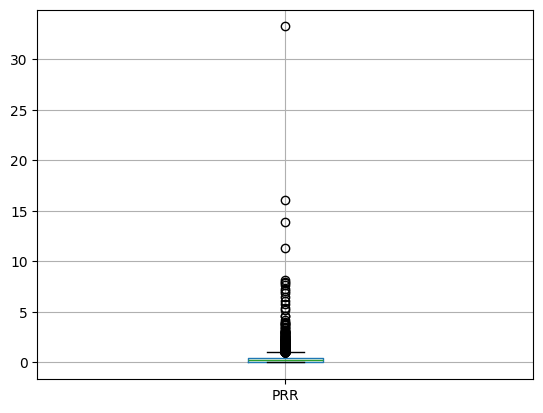

In [ ]:
# Plotting the values of our new variable.
print(f"There are {(df_customer_copy['PRR'] > 1).sum()} customers with a PRR above 1\n")

df_customer_copy.boxplot(column='PRR')
plt.show()

There are people with more points redeemed than earned in the observed time period.

Maybe a pivot table would reveal something interesting about our "big redeemers".

In [ ]:
# We create a boolean variable which is true if the PRR is above 1 for a given customer.
df_customer_copy['PRR_Above_One'] = df_customer_copy['PRR'] > 1

pivot = df_customer_copy.pivot_table(
    index='PRR_Above_One',
    values=['Subscription_Duration_Days', 'Total_Distance_KM','Total_Points_Redeemed','Total_Points_Accumulated'],
    aggfunc='mean'
)
print(pivot) # Interesting results.

               Subscription_Duration_Days  Total_Distance_KM  \
PRR_Above_One                                                  
False                         2291.104803      291535.984196   
True                          1557.676856      129188.218559   

               Total_Points_Accumulated  Total_Points_Redeemed  
PRR_Above_One                                                   
False                      29147.875442            8287.259748  
True                       12915.596965           16453.098472  


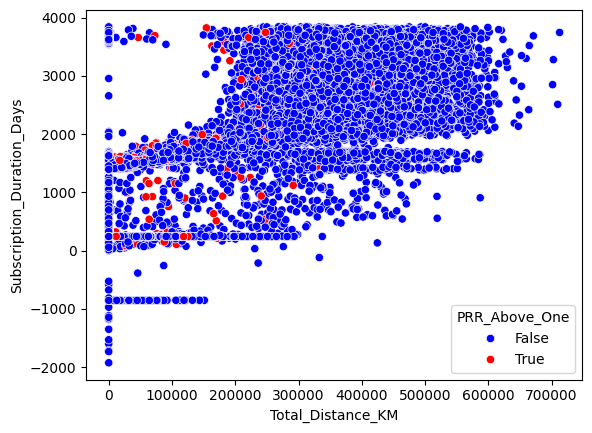

In [ ]:
# A bit of plotting
sns.scatterplot(data=df_customer_copy, x='Total_Distance_KM', y='Subscription_Duration_Days', hue='PRR_Above_One', palette={0: 'blue', 1: 'red'})
plt.show()

Notes here:


*   The Subscription_Duration_Days should not be below 0
*   The more someone travels the less common it becomes to have a PRR above 1 (Unsurprisingly, travelling a lot means earning a lot of points)



There are 201 subscription durations that are less than 0.



<Axes: >

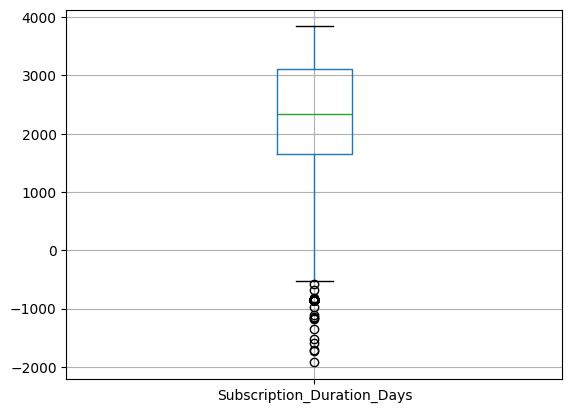

In [ ]:
# See how many under 0 durations we have.
print(f"There are {(df_customer_copy['Subscription_Duration_Days'] <= 0).sum()} subscription durations that are less than 0.\n")

df_customer_copy.boxplot(column = 'Subscription_Duration_Days')

### Average flight distance (The sum of all kilometers divided by the number of flights)

In [ ]:
# Here we create the average flight distance variable
df_customer_copy['Avg_Flight_Dist_KM'] = df_customer_copy['Total_Distance_KM'] / df_customer_copy['Total_Num_Flights']
df_customer_copy['Avg_Flight_Dist_KM'].describe() # There are infinite values, presumably because of a division by 0.

,Avg_Flight_Dist_KM
count,1.510500e+04
mean,inf
std,NaN
min,2.592308e+01
25%,1.729727e+03
50%,2.032273e+03
75%,2.379268e+03
max,inf


In [ ]:
# Check how many inf values we have.
print(f" We have {np.isinf(df_customer_copy['Avg_Flight_Dist_KM']).sum()} inf values within our new variable")

# Check what the travelled distances and total number of flights are for the customers with an infinite average flight distance.
inf_rows = df_customer_copy[np.isinf(df_customer_copy['Avg_Flight_Dist_KM'])]
print(inf_rows[['Loyalty#','Total_Distance_KM', 'Total_Num_Flights']])

 We have 4 inf values within our new variable
      Loyalty#  Total_Distance_KM  Total_Num_Flights
2387    244734             2263.0                0.0
2790    765223            11439.0                0.0
5771    884654             1138.0                0.0
6719    828328            20586.0                0.0


As expected, we have 0 number of flights in total for all these observations. Let's see if this is a mistake in the variable or in the data.

In [ ]:
# Check how many flights were there for each of these loyalty numbers.
loyalty_nums = [244734, 765223, 884654, 828328]
subset = df_flights[df_flights['Loyalty#'].isin(loyalty_nums)]
display(subset[['Loyalty#','DistanceKM','NumFlights']])

,Loyalty#,DistanceKM,NumFlights
3321,884654,0.0,0.0
14024,884654,0.0,0.0
15161,244734,0.0,0.0
15426,828328,0.0,0.0
16369,765223,0.0,0.0
...,...,...,...
578018,884654,0.0,0.0
582740,244734,0.0,0.0
592397,765223,0.0,0.0
593527,828328,0.0,0.0


There are a few cases where there is a distance recorded for the period, however the number of flights is set to 0.

Let's check whether this applies to any other flight in our dataset.

If it does, we should do this as the first step, even before aggregating the values.

In [ ]:
# Check how many occurances there are of the number of flights being 0 with the distance travelled being more than 0.
count = ((df_flights['NumFlights'] == 0) & (df_flights['DistanceKM'] != 0)).sum()
print(f"There are {count} cases of this error occuring.")

There are 5823 cases of this error occuring.


### Companion ratio (For what proportion of the flights did the customer have a companion)

In [ ]:
# We create the companion ratio feature.
df_customer_copy['Comp_Ratio'] = df_customer_copy['Total_Num_Flights_With_Companions'] / df_customer_copy['Total_Num_Flights']
df_customer_copy['Comp_Ratio'].describe()

,Comp_Ratio
count,15101.000000
mean,0.258169
std,0.119751
min,0.000000
25%,0.187500
50%,0.250000
75%,0.316253
max,1.000000


Text(0, 0.5, 'Frequency')

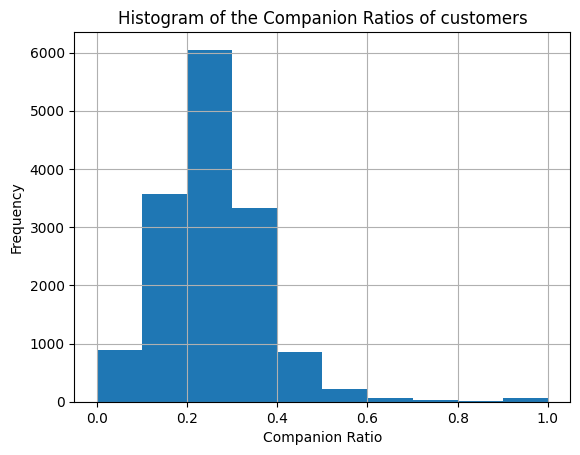

In [ ]:
# Visualizing the distribution of our new variable with a histogram
df_customer_copy['Comp_Ratio'].hist()
plt.title('Histogram of the Companion Ratios of customers')
plt.xlabel('Companion Ratio')
plt.ylabel('Frequency')

# Task
Modify the dataframe `df_flights` by merging it with `df_costumer` on 'Loyalty#' and adding four new columns: 'NumFlights_normalized_sub', 'NumFlightsWithCompanions_normalized_sub', 'NumFlights_normalized_not_sub', and 'NumFlightsWithCompanions_normalized_not_sub'. These columns should represent the original 'NumFlights' and 'NumFlightsWithCompanions' values normalized by the percentage of days the customer was subscribed ('_sub') or not subscribed ('_not_sub') within the month of the flight. Display the updated `df_flights` dataframe.

## Merge dataframes

### Subtask:
Merge `df_flights` and `df_costumer` DataFrames on 'Loyalty#'.


**Reasoning**:
Merge df_flights and df_costumer DataFrames on 'Loyalty#'.

